In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

In [2]:
# load dataset
url = 'https://docs.google.com/spreadsheets/d/1VMaw2oCn0ABitd-alLAEsEhGS1Je2UFNLu76TKrIH7w/gviz/tq?tqx=out:csv&sheet=Raw_Medical_Data_for_day1'
df = pd.read_csv(url, index_col = 0)
df.head()

,State,Lat,Lng,Area,Children,Age,Income,Marital,Gender,ReAdmis,...,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges
1,AL,34.34960,-86.72508,Suburban,1.0,53,86575.93,Divorced,Male,0,...,0.0,1.0,1.0,1.0,0,1,Blood Work,10.585770,3726.702860,17939.403420
2,FL,30.84513,-85.22907,Urban,3.0,51,46805.99,Married,Female,0,...,0.0,0.0,0.0,0.0,1,0,Intravenous,15.129562,4193.190458,17612.998120
3,SD,43.54321,-96.63772,Suburban,3.0,53,14370.14,Widowed,Female,0,...,0.0,0.0,0.0,0.0,0,0,Blood Work,4.772177,2434.234222,17505.192460
4,MN,43.89744,-93.51479,Suburban,0.0,78,39741.49,Married,Male,0,...,0.0,0.0,0.0,0.0,1,1,Blood Work,1.714879,2127.830423,12993.437350
5,VA,37.59894,-76.88958,Rural,1.0,22,1209.56,Widowed,Female,0,...,1.0,0.0,0.0,1.0,0,0,CT Scan,1.254807,2113.073274,3716.525786


We will analyze these features: 
* VitD_levels
* Doc_visits
+ TotalCharge

In [7]:
df.columns

Index(['State', 'Lat', 'Lng', 'Area', 'Children', 'Age', 'Income', 'Marital',
       'Gender', 'ReAdmis', 'VitD_levels', 'Doc_visits', 'Full_meals_eaten',
       'vitD_supp', 'Soft_drink', 'Initial_admin', 'HighBlood', 'Stroke',
       'Complication_risk', 'Overweight', 'Arthritis', 'Diabetes',
       'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis',
       'Reflux_esophagitis', 'Asthma', 'Services', 'Initial_days',
       'TotalCharge', 'Additional_charges'],
      dtype='object')

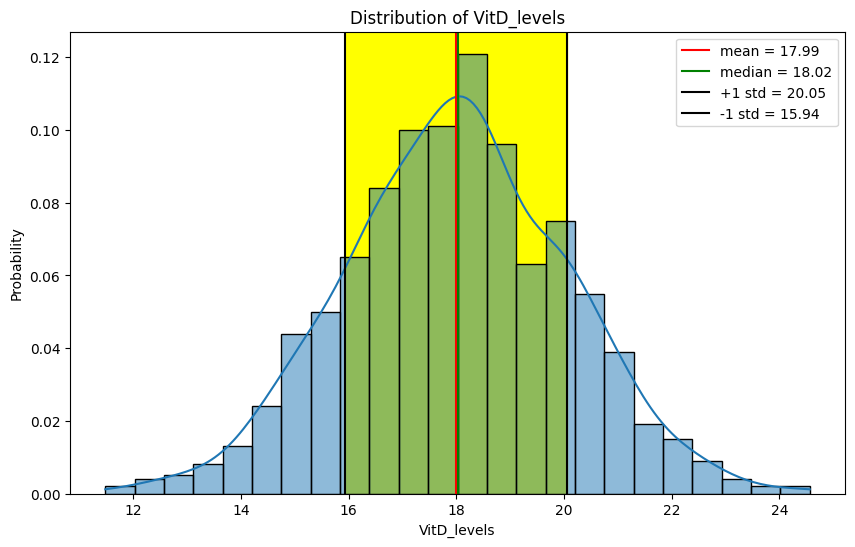

In [5]:
# Plot histogram and Kde for VitD_levels
col = 'VitD_levels'
feature = df[col]
mean = feature.mean()
median = feature.median()
std = feature.std()
plus_one_std = mean + std
minus_one_std = mean - std
fig,ax = plt.subplots(figsize=(10,6))
sns.histplot(feature ,ax=ax,stat='probability', kde=True)
ax.axvline(mean, color = 'red',label=f'mean = {mean:,.2f}')
ax.axvline(median, color = 'green',label=f'median = {median:,.2f}')
ax.axvline(plus_one_std, color = 'black',label=f'+1 std = {plus_one_std:,.2f}')
ax.axvline(minus_one_std, color = 'black', label = f'-1 std = {minus_one_std:,.2f}')
ax.axvspan(plus_one_std, minus_one_std, color = 'yellow', zorder = 0)
ax.set_title(f'Distribution of {col}')
ax.legend();

Is it Discrete or Continuous?
Does it have a skew? If so, which direction (+/-)
What type of kurtosis does it display? (Mesokurtic, Leptokurtic, Platykurtic)

Visual Information

1. The data is continuous 
2. It's a Normal distribution
3. It displays a Mesokurtic kurtosis

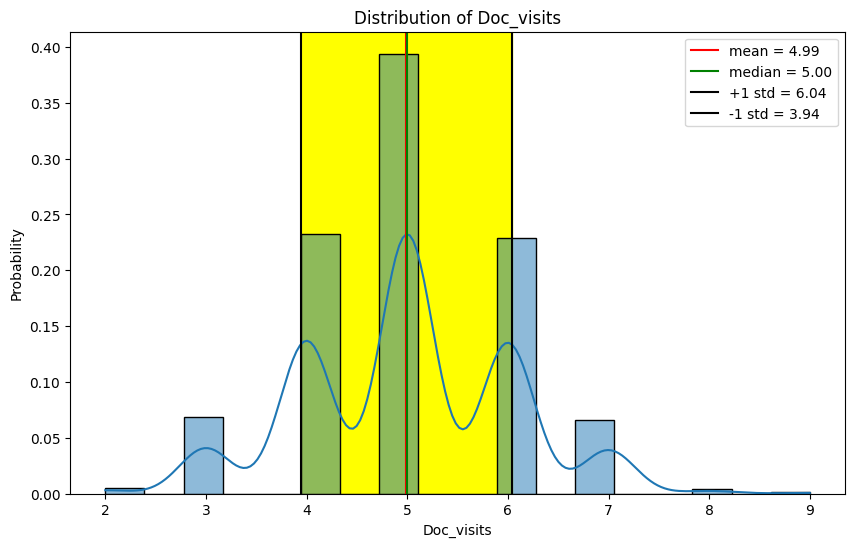

In [6]:
# Plot histogram and Kde for 'Doc_visits'
col = 'Doc_visits'
feature = df[col]
mean = feature.mean()
median = feature.median()
std = feature.std()
plus_one_std = mean + std
minus_one_std = mean - std
fig,ax = plt.subplots(figsize=(10,6))
sns.histplot(feature ,ax=ax,stat='probability', kde=True)
ax.axvline(mean, color = 'red',label=f'mean = {mean:,.2f}')
ax.axvline(median, color = 'green',label=f'median = {median:,.2f}')
ax.axvline(plus_one_std, color = 'black',label=f'+1 std = {plus_one_std:,.2f}')
ax.axvline(minus_one_std, color = 'black', label = f'-1 std = {minus_one_std:,.2f}')
ax.axvspan(plus_one_std, minus_one_std, color = 'yellow', zorder = 0)
ax.set_title(f'Distribution of {col}')
ax.legend();

Visual Information

1. The data is Discrete 
2. It's a Normal distribution
3. It displays a Mesokurtic kurtosis

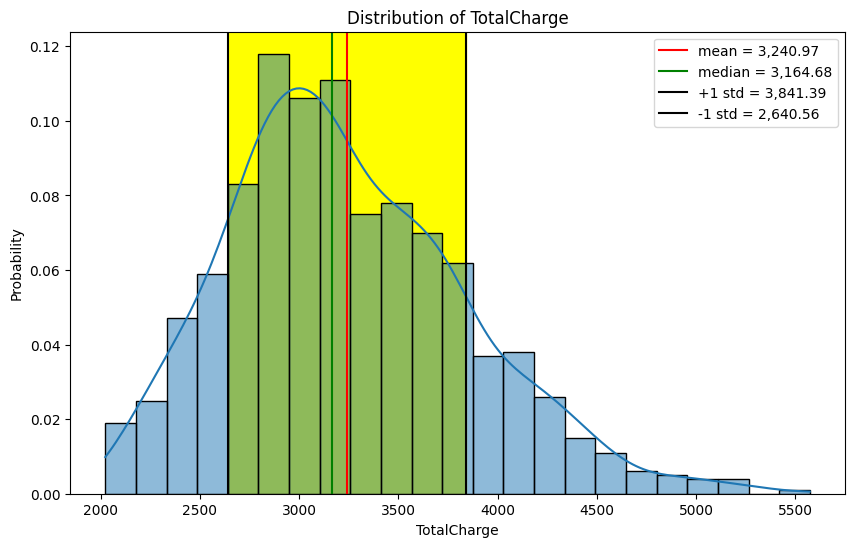

In [22]:
# Plot histogram and Kde for TotalCharge
col = 'TotalCharge'
feature = df[col]
mean = feature.mean()
median = feature.median()
mode = feature.mode()
std = feature.std()
plus_one_std = mean + std
minus_one_std = mean - std
fig,ax = plt.subplots(figsize=(10,6))
sns.histplot(feature ,ax=ax,stat='probability', kde=True)
ax.axvline(mean, color = 'red',label=f'mean = {mean:,.2f}')
ax.axvline(median, color = 'green',label=f'median = {median:,.2f}')
ax.axvline(plus_one_std, color = 'black',label=f'+1 std = {plus_one_std:,.2f}')
ax.axvline(minus_one_std, color = 'black', label = f'-1 std = {minus_one_std:,.2f}')
ax.axvspan(plus_one_std, minus_one_std, color = 'yellow', zorder = 0)
ax.set_title(f'Distribution of {col}')
ax.legend();

Visual Information

1. The data is Continuous
2. It's Postive(right) skewed
3. It displays a Leptokurtic kurtosis